# MIMIC-II IAC

This tutorial explores the MIMIC-II IAC dataset. It was created for the purpose of a case study in the book: Secondary Analysis of Electronic Health Records, published by Springer in 2016. In particular, the dataset was used throughout Chapter 16 (Data Analysis) by Raffa J. et al. to investigate the effectiveness of indwelling arterial catheters in hemodynamically stable patients with respiratory failure for mortality outcomes. The dataset is derived from MIMIC-II, the publicly-accessible critical care database. It contains summary clinical data and  outcomes for 1,776 patients.

More details on the dataset can be found here: https://physionet.org/content/mimic2-iaccd/1.0/.

## Importing ehrapy and setting plotting parameters

In [1]:
import ehrapy.api as ep
import seaborn as sns
import matplotlib.pyplot as plt

Unable to contact PyPI to check for the latest ehrapy version. Do you have an internet 
connection?

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/medcat/cat.py:16: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Model en_core_sci_sm is not installed. Refer to the ehrapy installation instructions if 
required.

Model en_core_sci_md is not installed. Refer to the ehrapy installation instructions if 
required.

Model en_core_sci_lg is not installed. Refer to the ehrapy installation instructions if 
required.

In [2]:
ep.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more 
discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid 
breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing 
this message. For the latest features and bug fixes, please install `session_info` instead. 
The usage and defaults also changed slightly, so please review the latest README at 
https://gitlab.com/joelostblom/session_info.
-----
ehrapy      0.1.0
rich        NA
scanpy      1.8.2
sinfo       0.3.4
-----
PIL                         8.4.0
PyPDF2                      1.26.0
anndata                     0.7.8
anyio                       NA
attr                        21.4.0
babel                       2.9.1
backcall                    0.2.0
backports                   NA
beta_ufunc                  NA
binom_ufunc                 NA
blis                        NA
camelot                     0.10.1
catalogue                   NA
category_encoders           2.3.0
certifi                     2021.10.08
cffi                        1.15.0
chardet                     4.0.0
charset_normalizer          2.0.9
click                       7.1.2
colorama                    0.4.4
cryptography                36.0.1
cv2                         4.5.5
cycler                      0.10.0
cymem                       NA
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.0
deepl                       1.3.1
defusedxml                  0.7.1
dill                        0.3.4
entrypoints                 0.3
filelock                    3.4.2
gensim                      4.1.2
h5py                        3.6.0
huggingface_hub             0.0.19
idna                        3.3
igraph                      0.9.8
importlib_resources         NA
ipykernel                   6.5.0
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
jinja2                      3.0.3
joblib                      1.1.0
json5                       NA
jsonpickle                  2.0.0
jsonschema                  4.3.2
jupyter_server              1.11.2
jupyterlab_server           2.8.2
kiwisolver                  1.3.2
leidenalg                   0.8.8
llvmlite                    0.37.0
markupsafe                  2.0.1
matplotlib                  3.5.1
matplotlib_inline           NA
medcat                      NA
mpl_toolkits                NA
mudata                      0.1.1
multiprocess                0.70.12.2
murmurhash                  NA
natsort                     8.0.2
nbclassic                   NA
nbformat                    5.1.3
nbinom_ufunc                NA
numba                       0.54.1
numexpr                     2.8.1
numpy                       1.20.3
packaging                   21.3
pandas                      1.3.4
parso                       0.8.3
patsy                       0.5.2
pdfminer                    20211012
pexpect                     4.8.0
pickleshare                 0.7.5
pkg_resources               NA
preshed                     NA
prometheus_client           NA
prompt_toolkit              3.0.24
psutil                      5.9.0
ptyprocess                  0.7.0
pvectorc                    NA
pyarrow                     6.0.1
pydantic                    NA
pydev_ipython               NA
pydevconsole                NA
pydevd                      2.6.0
pydevd_concurrency_analyser NA
pydevd_file_utils           NA
pydevd_plugins              NA
pydevd_tracing              NA
pygments                    2.11.0
pyhpo                       3.0.0
pyparsing                   3.0.6
pypi_latest                 0.1.1
pyrsistent                  NA
pytz                        2021.3
questionary                 1.10.0
requests                    2.26.0
ruamel                      NA
scipy                       1.7.1
seaborn                     0.11.2
send2trash             

In [3]:
ep.settings.set_figure_params(figsize=(4, 4))

## Fetching the MIMIC II dataset and encoding it

In [4]:
adata = ep.dt.mimic_2(encoded=False)

It is also possible to get the MIMIC-II dataset already pre-encoded by setting the encoded flag to 'True'. ehrapy's default encoding is a simple label encoding in this case.

In [5]:
adata

AnnData object with n_obs × n_vars = 1776 × 46
    layers: 'original'

The MIMIC-II dataset has 1776 patients as described above with 46 features.

The **service_unit** and **day_icu_intime** variables are categorical 

In [6]:
adata = ep.pp.encode(
    adata, encodings={"one_hot_encoding": ["service_unit", "day_icu_intime"]}
)

 Setting up one_hot_encoding ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0%

In [7]:
adata

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'encoding_to_var', 'original_values_categoricals', 'var_to_encoding'
    layers: 'original'

After one-hot encoding the two columns we've expanded our matrix from 46 to 54 features.
Let's verify that we've indeed encoded all columns and are ready to proceed.

In [8]:
ep.pp.type_overview(adata)

Variable names for AnnData object with 54 vars and 1776 obs                                  
╠══ 🔐 Encoded variables                                                                     
║   ╠══ service_unit -> 3 categories; one hot encoded; original data type: string            
║   ╚══ day_icu_intime -> 7 categories; one hot encoded; original data type: string          
╚══ 🔓 Unencoded variables                                                                   
    ╠══ aline_flg -> data type: numerical                                                    
    ╠══ icu_los_day -> data type: numerical                                                  
    ╠══ hospital_los_day -> data type: numerical                                             
    ╠══ age -> data type: numerical                                                          
    ╠══ gender_num -> data type: numerical                                                   
    ╠══ weight_first -> data type: numerical                                                 
    ╠══ bmi -> data type: numerical                                                          
    ╠══ sapsi_first -> data type: numerical                                                  
    ╠══ sofa_first -> data type: numerical                                                   
    ╠══ service_num -> data type: numerical                                                  
    ╠══ day_icu_intime_num -> data type: numerical                                           
    ╠══ hour_icu_intime -> data type: numerical                                              
    ╠══ hosp_exp_flg -> data type: numerical                                                 
    ╠══ icu_exp_flg -> data type: numerical                                                  
    ╠══ day_28_flg -> data type: numerical                                                   
    ╠══ mort_day_censored -> data type: numerical                                            
    ╠══ censor_flg -> data type: numerical                                                   
    ╠══ sepsis_flg -> data type: numerical                                                   
    ╠══ chf_flg -> data type: numerical                                                      
    ╠══ afib_flg -> data type: numerical                                                     
    ╠══ renal_flg -> data type: numerical                                                    
    ╠══ liver_flg -> data type: numerical                                                    
    ╠══ copd_flg -> data type: numerical                                                     
    ╠══ cad_flg -> data type: numerical                                                      
    ╠══ stroke_flg -> data type: numerical                                                   
    ╠══ mal_flg -> data type: numerical                                                      
    ╠══ resp_flg -> data type: numerical                                                     
    ╠══ map_1st -> data type: numerical                                                      
    ╠══ hr_1st -> data type: numerical                                                       
    ╠══ temp_1st -> data type: numerical                                                     
    ╠══ spo2_1st -> data type: numerical                                                     
    ╠══ abg_count -> data type: numerical                                                    
    ╠══ wbc_first -> data type: numerical                                                    
    ╠══ hgb_first -> data type: numerical                                                    
    ╠══ platelet_first -> data type: numerical                                               
    ╠══ sodium_first -> data type: numerical                                                 
    ╠══ potassium_first -> data type: numerical                                              
    ╠══ tco2_first -> data type: numerical            

# Preprocessing

## Quality control - missing values

ehrapy's **qc_metrics** function will calculate several useful metrics such as the absolute number and percentages of missing values and properties like the mean/median/min/max of all features.

In [9]:
_ = ep.pp.calculate_qc_metrics(adata)

In [10]:
adata.obs

service_unit day_icu_intime  missing_values_abs  missing_values_pct
0            SICU      Friday                      0            0.000000
1            MICU      Saturday                   12           22.222222
2            MICU      Friday                      0            0.000000
3            SICU      Saturday                    3            5.555556
4            SICU      Saturday                    0            0.000000
...           ...            ...                 ...                 ...
1771         MICU      Sunday                      1            1.851852
1772         SICU      Saturday                    1            1.851852
1773         MICU      Tuesday                     3            5.555556
1774         SICU      Wednesday                   1            1.851852
1775         MICU      Monday                      1            1.851852

[1776 rows x 4 columns]

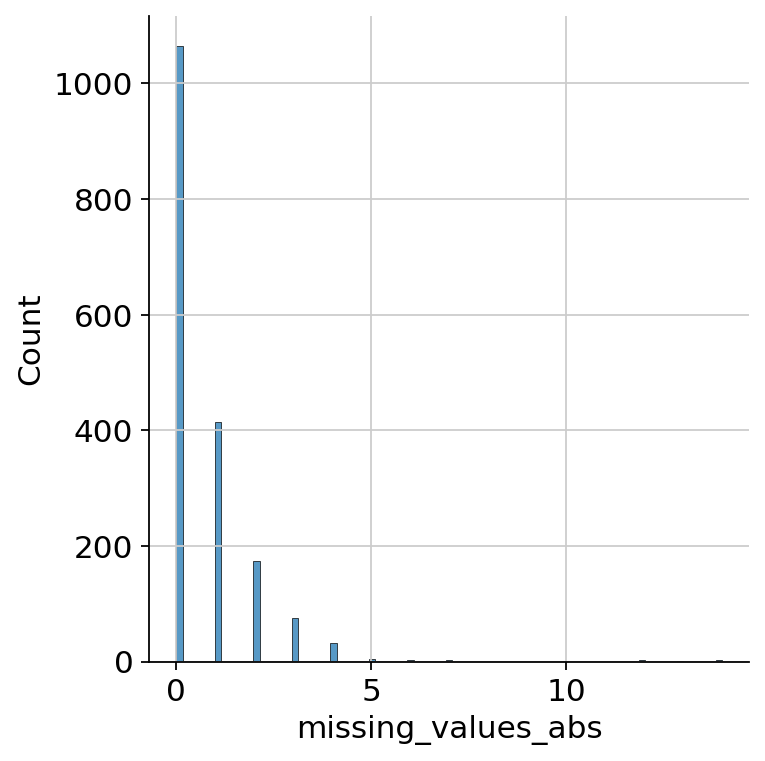

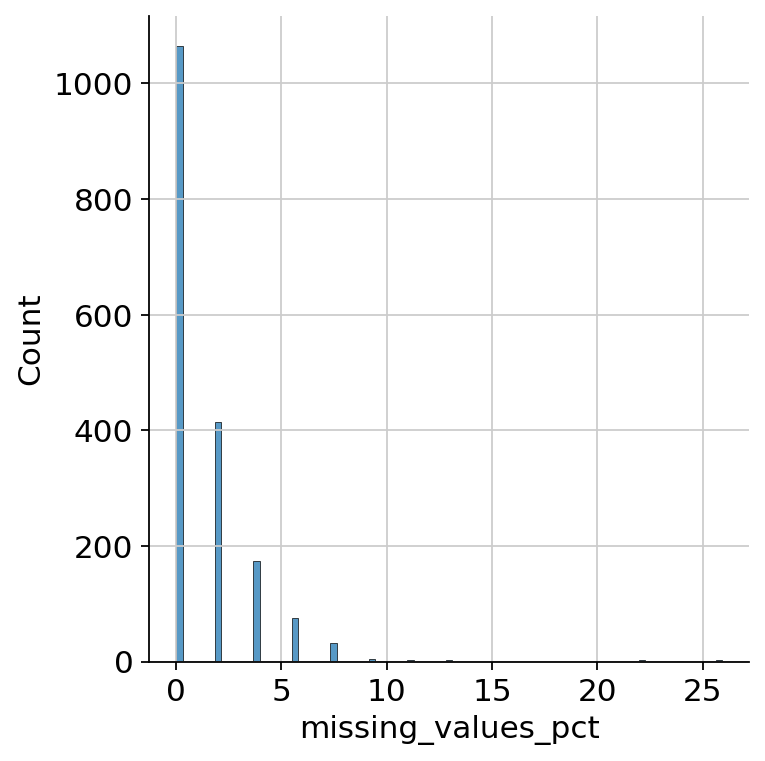

In [11]:
_ = sns.displot(adata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(adata.obs["missing_values_pct"])

In [12]:
adata.var

missing_values_abs  missing_values_pct  \
ehrapycat_service_unit_FICU                          0            0.000000   
ehrapycat_service_unit_MICU                          0            0.000000   
ehrapycat_service_unit_SICU                          0            0.000000   
ehrapycat_day_icu_intime_Friday                      0            0.000000   
ehrapycat_day_icu_intime_Monday                      0            0.000000   
ehrapycat_day_icu_intime_Saturday                    0            0.000000   
ehrapycat_day_icu_intime_Sunday                      0            0.000000   
ehrapycat_day_icu_intime_Thursday                    0            0.000000   
ehrapycat_day_icu_intime_Tuesday                     0            0.000000   
ehrapycat_day_icu_intime_Wednesday                   0            0.000000   
aline_flg                                            0            0.000000   
icu_los_day                                          0            0.000000   
hospital_los_day                                     0            0.000000   
age                                                  0            0.000000   
gender_num                                           1            0.056306   
weight_first                                       110            6.193694   
bmi                                                466           26.238739   
sapsi_first                                         85            4.786036   
sofa_first                                           6            0.337838   
service_num                                          0            0.000000   
day_icu_intime_num                                   0            0.000000   
hour_icu_intime                                      0            0.000000   
hosp_exp_flg                                         0            0.000000   
icu_exp_flg                                          0            0.000000   
day_28_flg                                           0            0.000000   
mort_day_censored                                    0            0.000000   
censor_flg                                           0            0.000000   
sepsis_flg                                           0            0.000000   
chf_flg                                              0            0.000000   
afib_flg                                             0            0.000000   
renal_flg                                            0            0.000000   
liver_flg                                            0            0.000000   
copd_flg                                             0            0.000000   
cad_flg                                              0            0.000000   
stroke_flg                                           0            0.000000   
mal_flg                                              0            0.000000   
resp_flg                                             0            0.000000   
map_1st                                              0            0.000000   
hr_1st                                               0            0.000000   
temp_1st                                             3            0.168919   
spo2_1st                                             0            0.000000   
abg_count                                            0            0.000000   
wbc_first                                            8            0.450450   
hgb_first                                            8            0.450450   
platelet_first                                       8            0.450450   
sodium_first                                         5            0.281532   
potassium_first                                      5            0.281532   
tco2_first                                           5            0.281532   
chloride_first                                       5            0.281532   
bun_first                                            5            0.281532   
creatinine_first                                     6    

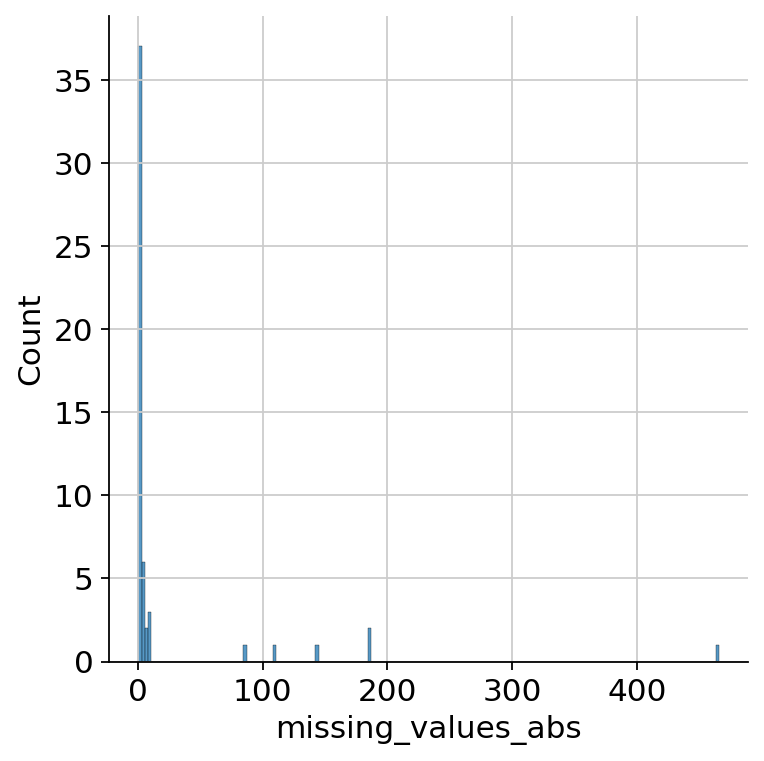

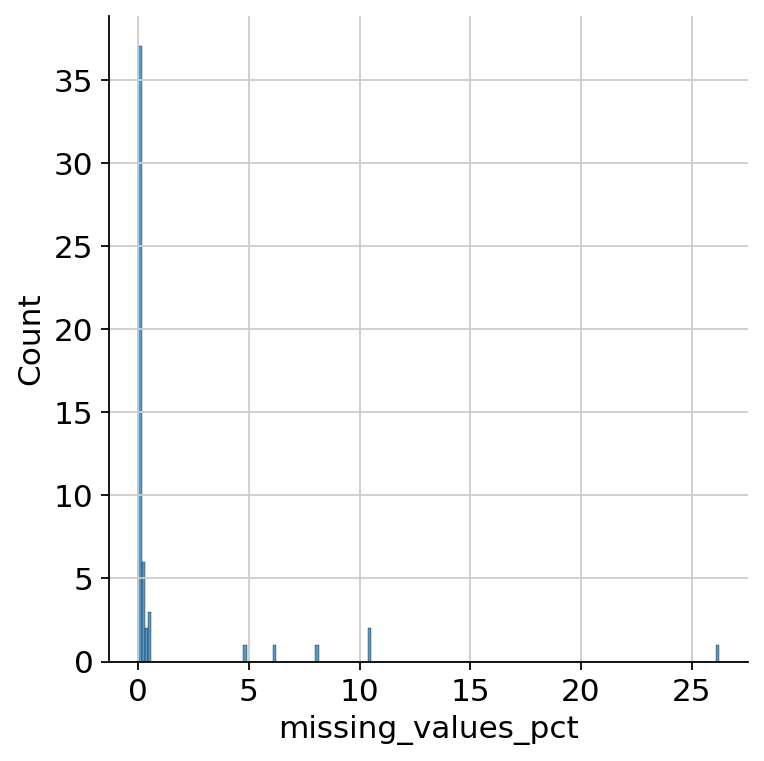

In [13]:
_ = sns.displot(adata.var["missing_values_abs"])
plt.show()

_ = sns.displot(adata.var["missing_values_pct"])

The data still has several features with missing values, but none of them exceed more than 27% (BMI) of percentage of missing values.
Hence, there is no need to drop any of the observations nor features. We can simply impute the missing values.

## Missing Data Imputation

In [14]:
ep.pp.knn_impute(adata)

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime', 'missing_values_abs', 'missing_values_pct'
    var: 'missing_values_abs', 'missing_values_pct', 'mean', 'median', 'standard_deviation', 'min', 'max'
    uns: 'encoding_to_var', 'original_values_categoricals', 'var_to_encoding'
    layers: 'original'

In [15]:
_ = ep.pp.calculate_qc_metrics(adata)

We can now confirm that there are indeed no missing values present.

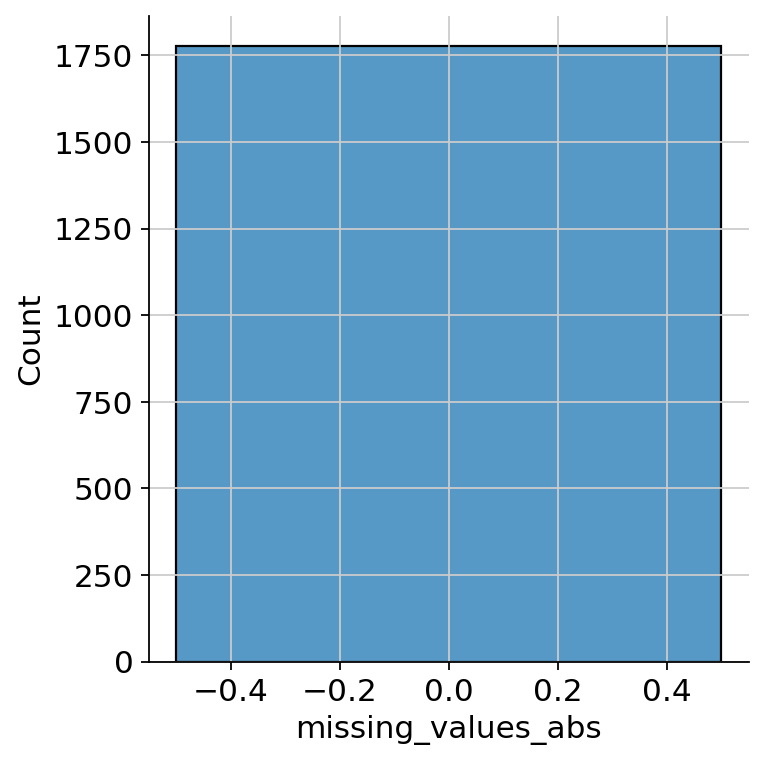

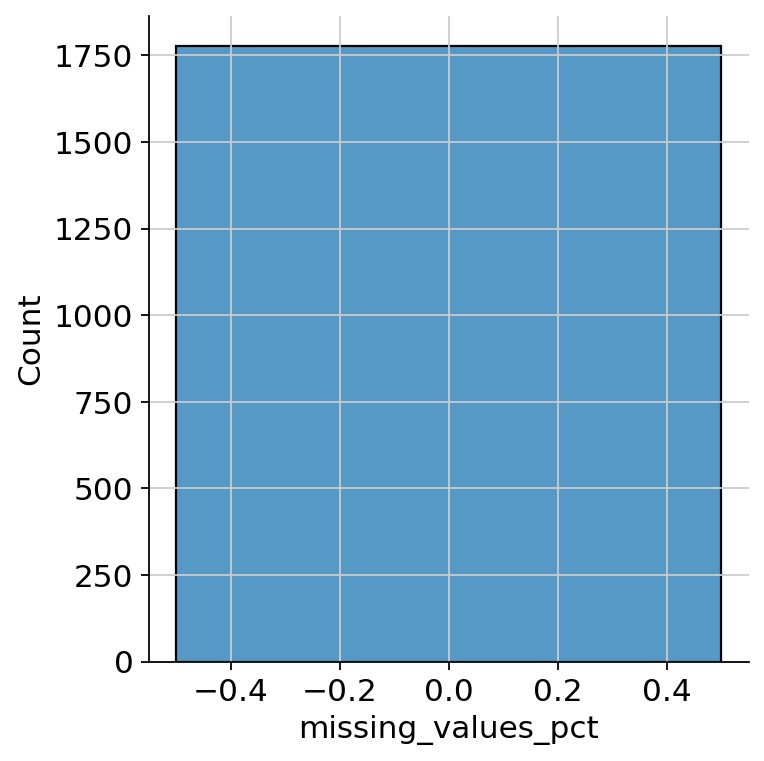

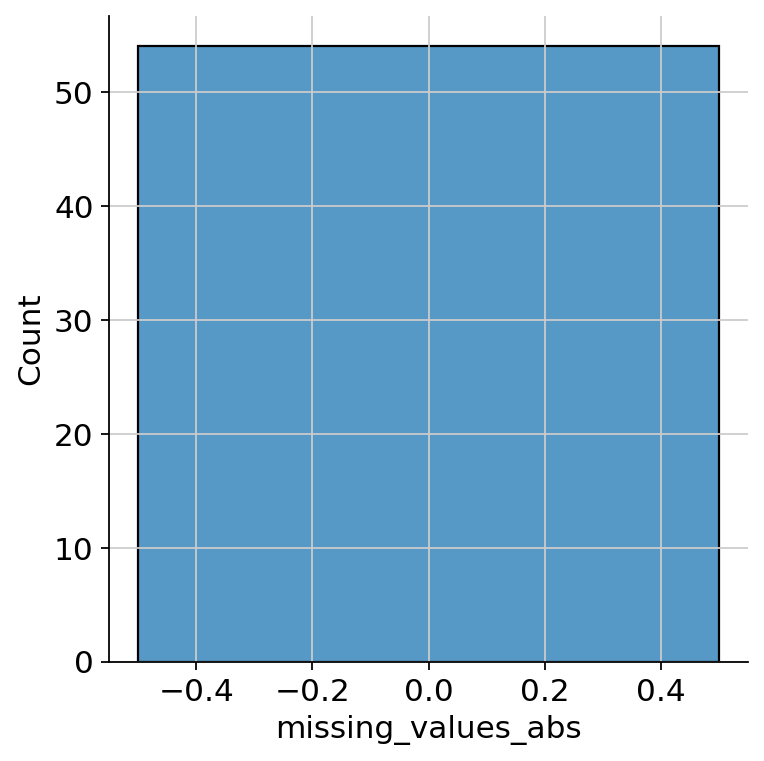

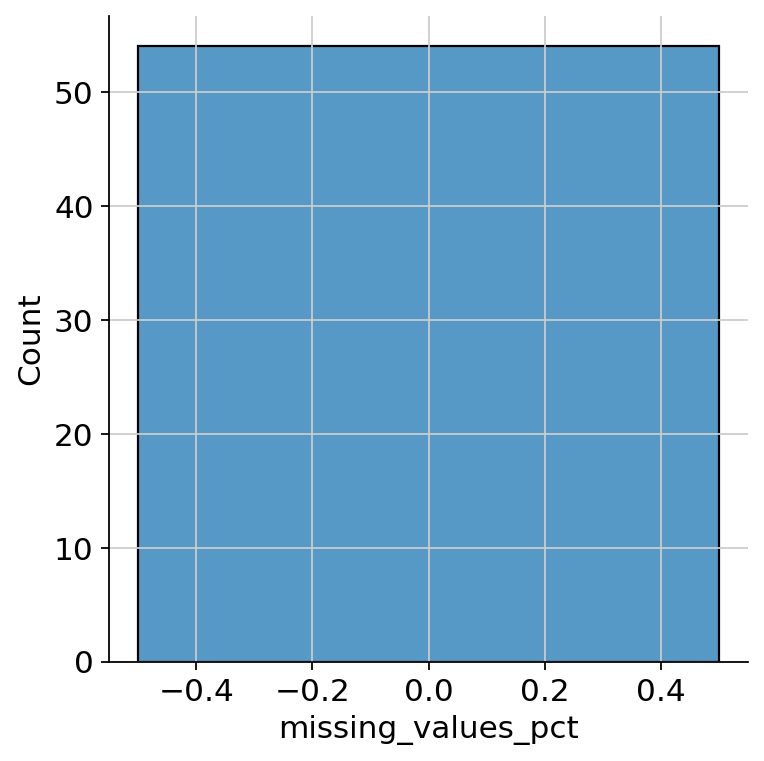

In [16]:
_ = sns.displot(adata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(adata.obs["missing_values_pct"])
plt.show()

_ = sns.displot(adata.var["missing_values_abs"])
plt.show()

_ = sns.displot(adata.var["missing_values_pct"])

## Quality Control - Data Distribution

Depending on the measurement and the unit of a measurement the value ranges of features may be huge.
Clusterings and differential comparisons especially may be greatly influenced by exceptionally big values.

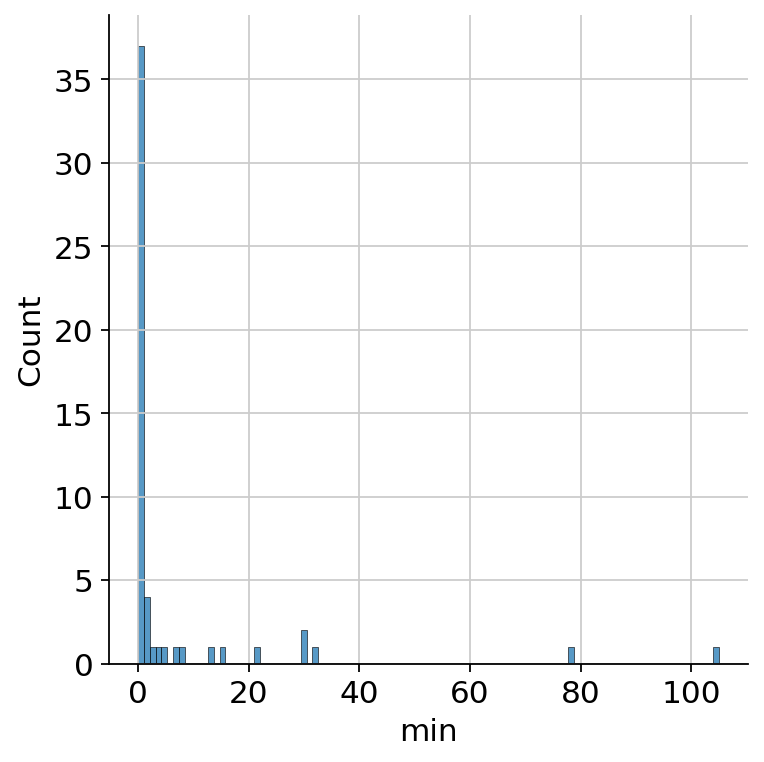

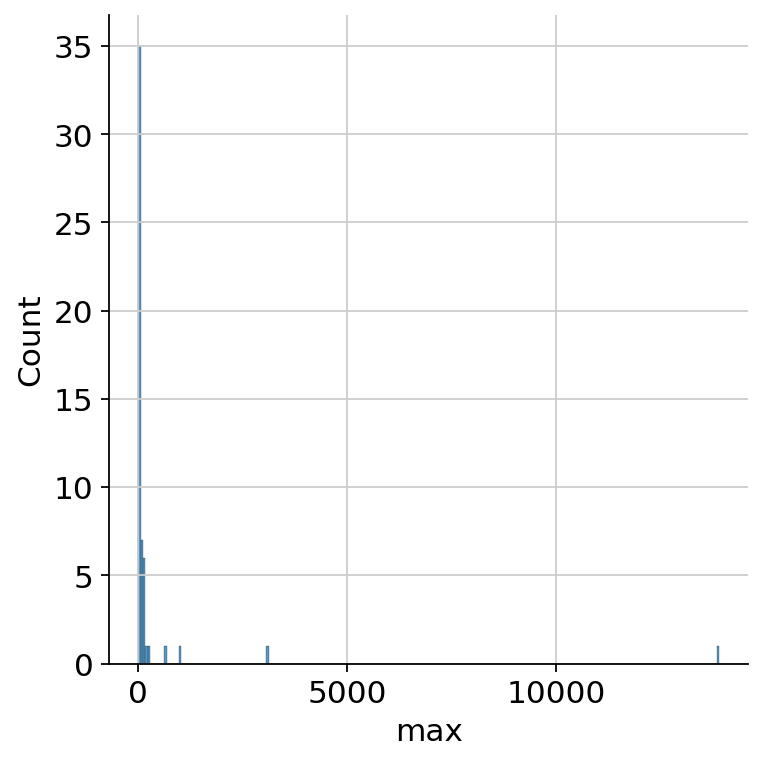

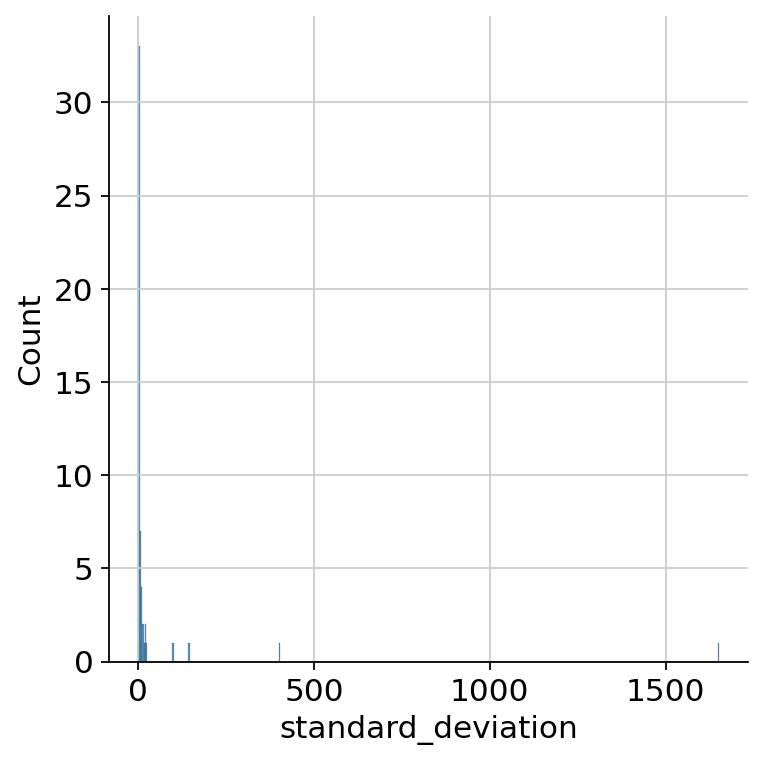

In [17]:
_ = sns.displot(adata.var["min"])
plt.show()

_ = sns.displot(adata.var["max"])
plt.show()

_ = sns.displot(adata.var["standard_deviation"])

In [18]:
adata.var[adata.var["standard_deviation"] > 500]

missing_values_abs  missing_values_pct         mean       median  \
iv_day_1                   0                 0.0  1613.186646  1086.674927   

          standard_deviation  min      max  
iv_day_1         1652.056885  0.0  13910.0

The standard deviation of the feature **iv_day_1** is huge together with a very low miniumum value of 0 and a maximum value of 13910.
This feature requires normalization.

## Normalization

In [19]:
# TODO

# PCA & UMAP

In [20]:
ep.pp.pca(adata)

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'service_unit' as categorical
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'day_icu_intime' as categorical


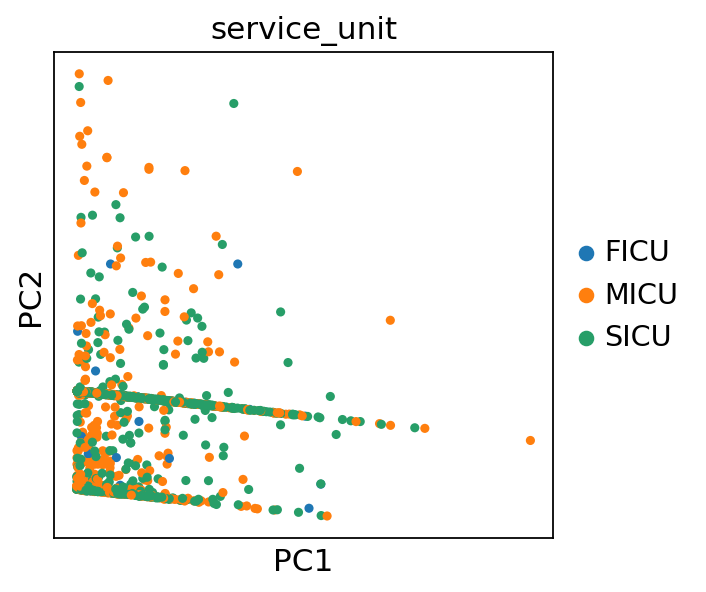

In [21]:
ep.pl.pca(adata, color="service_unit")

In [22]:
ep.pp.neighbors(adata)

In [23]:
ep.tl.umap(adata)

# Batch effect check

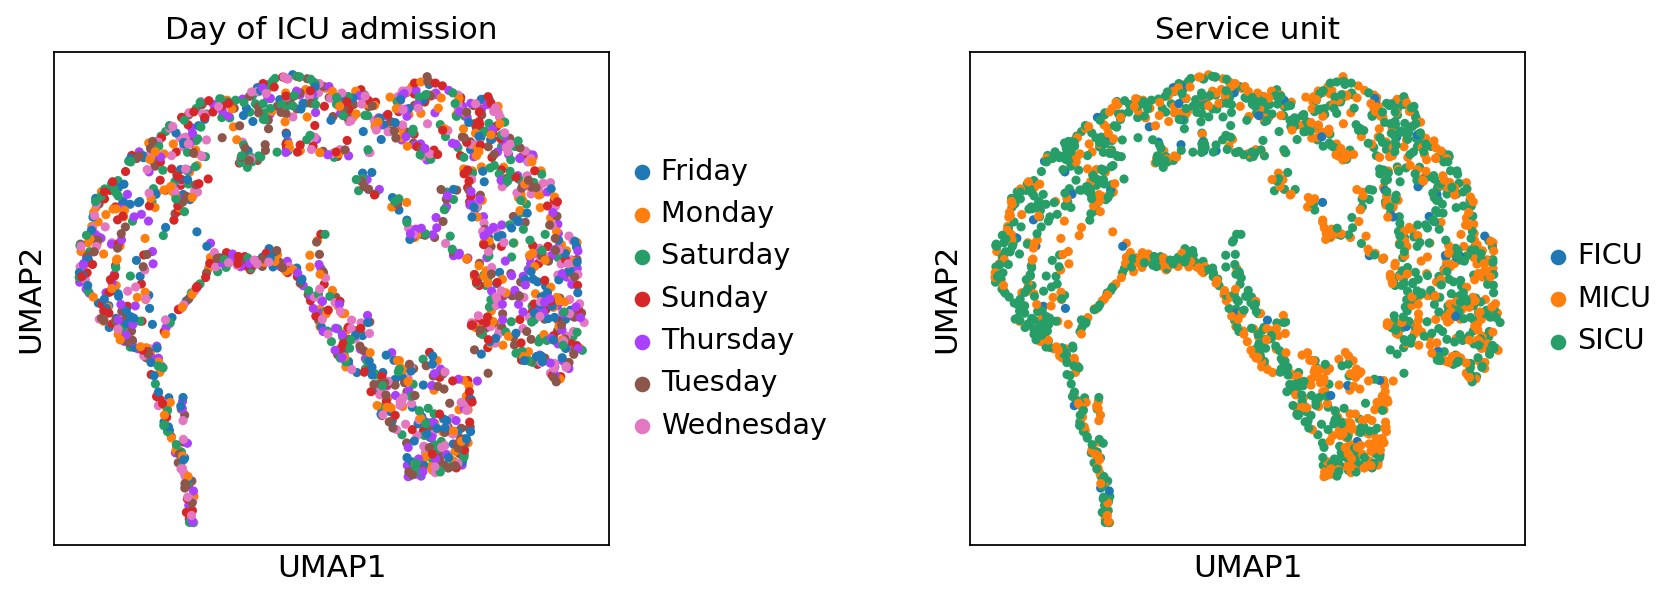

In [24]:
ep.pl.umap(
    adata,
    color=["day_icu_intime", "service_unit"],
    wspace=0.5,
    title=["Day of ICU admission", "Service unit"],
)

# Leiden clustering

In [25]:
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")

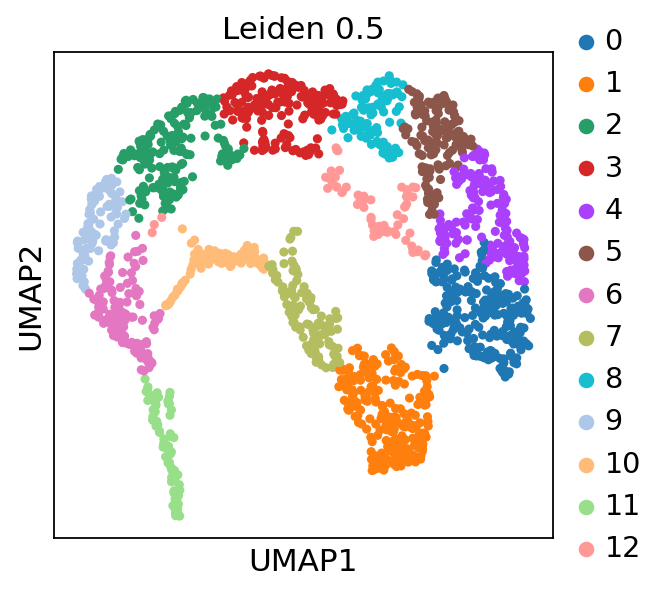

In [26]:
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

# Hospital & ICU statistics

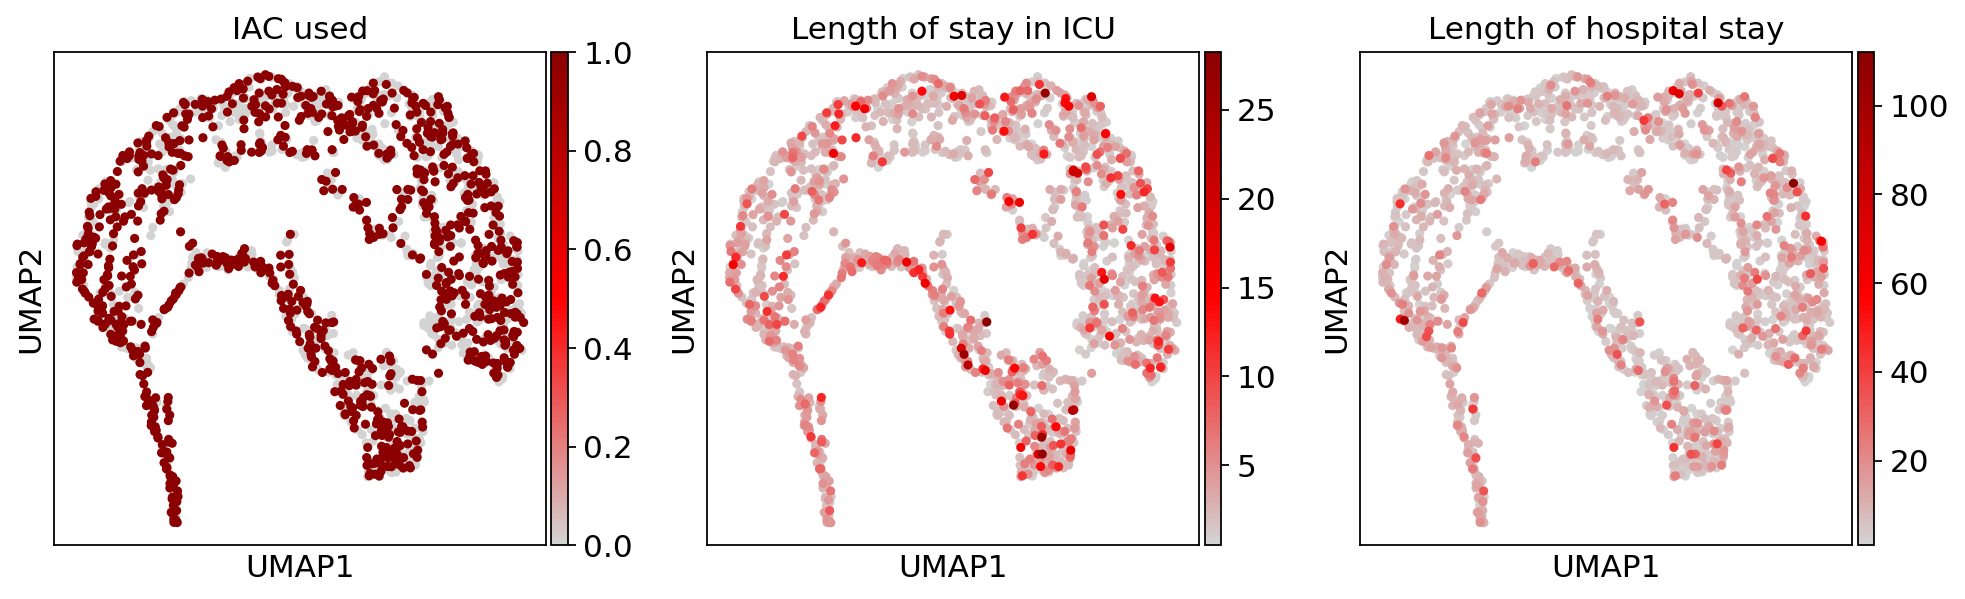

In [27]:
ep.pl.umap(
    adata,
    color=["aline_flg", "icu_los_day", "hospital_los_day"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["IAC used", "Length of stay in ICU", "Length of hospital stay"],
)

# Death

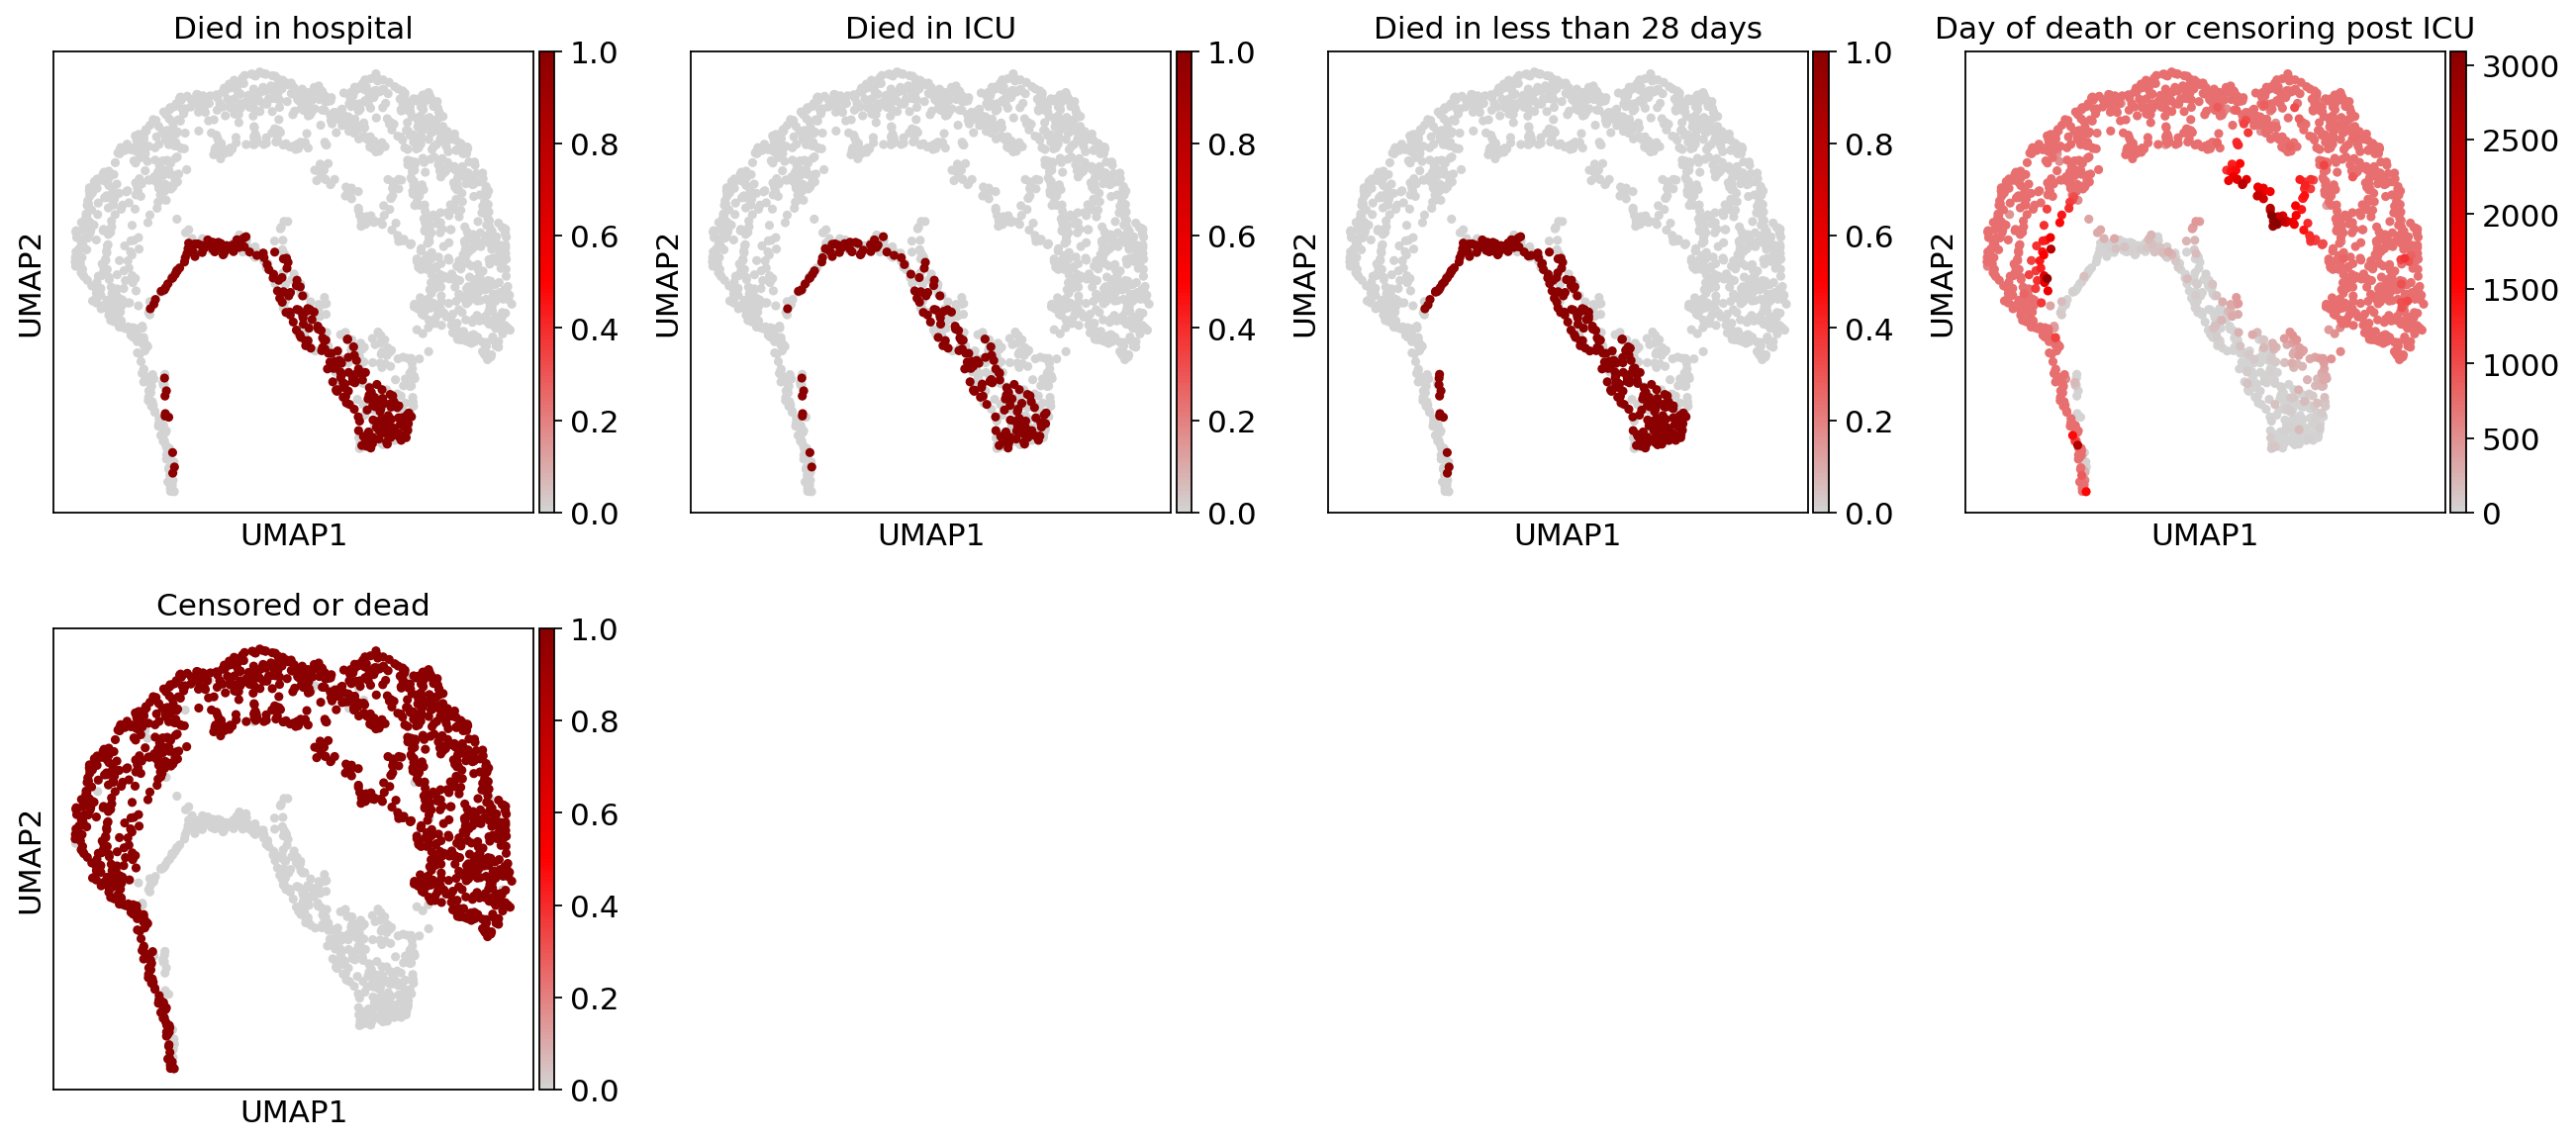

In [28]:
ep.pl.umap(
    adata,
    color=[
        "hosp_exp_flg",
        "icu_exp_flg",
        "day_28_flg",
        "mort_day_censored",
        "censor_flg",
    ],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=[
        "Died in hospital",
        "Died in ICU",
        "Died in less than 28 days",
        "Day of death or censoring post ICU",
        "Censored or dead",
    ],
)

# Demographics

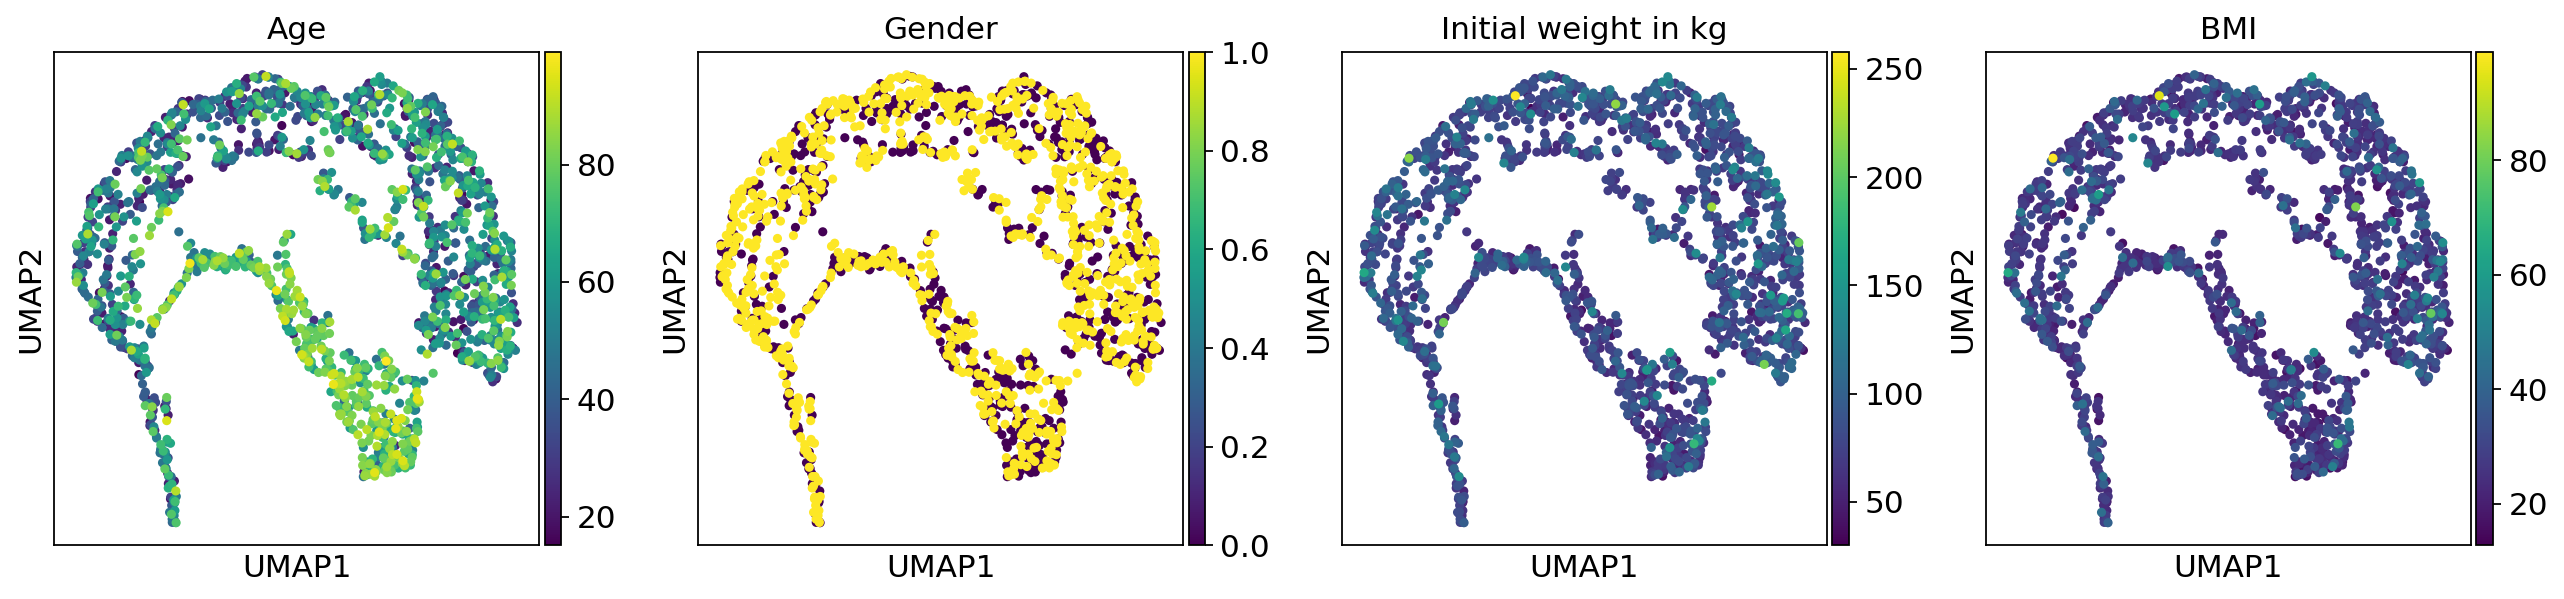

In [29]:
ep.pl.umap(
    adata,
    color=[
        "age",
        "gender_num",
        "weight_first",
        "bmi",
    ],
    title=["Age", "Gender", "Initial weight in kg", "BMI"],
)

# Comorbidities

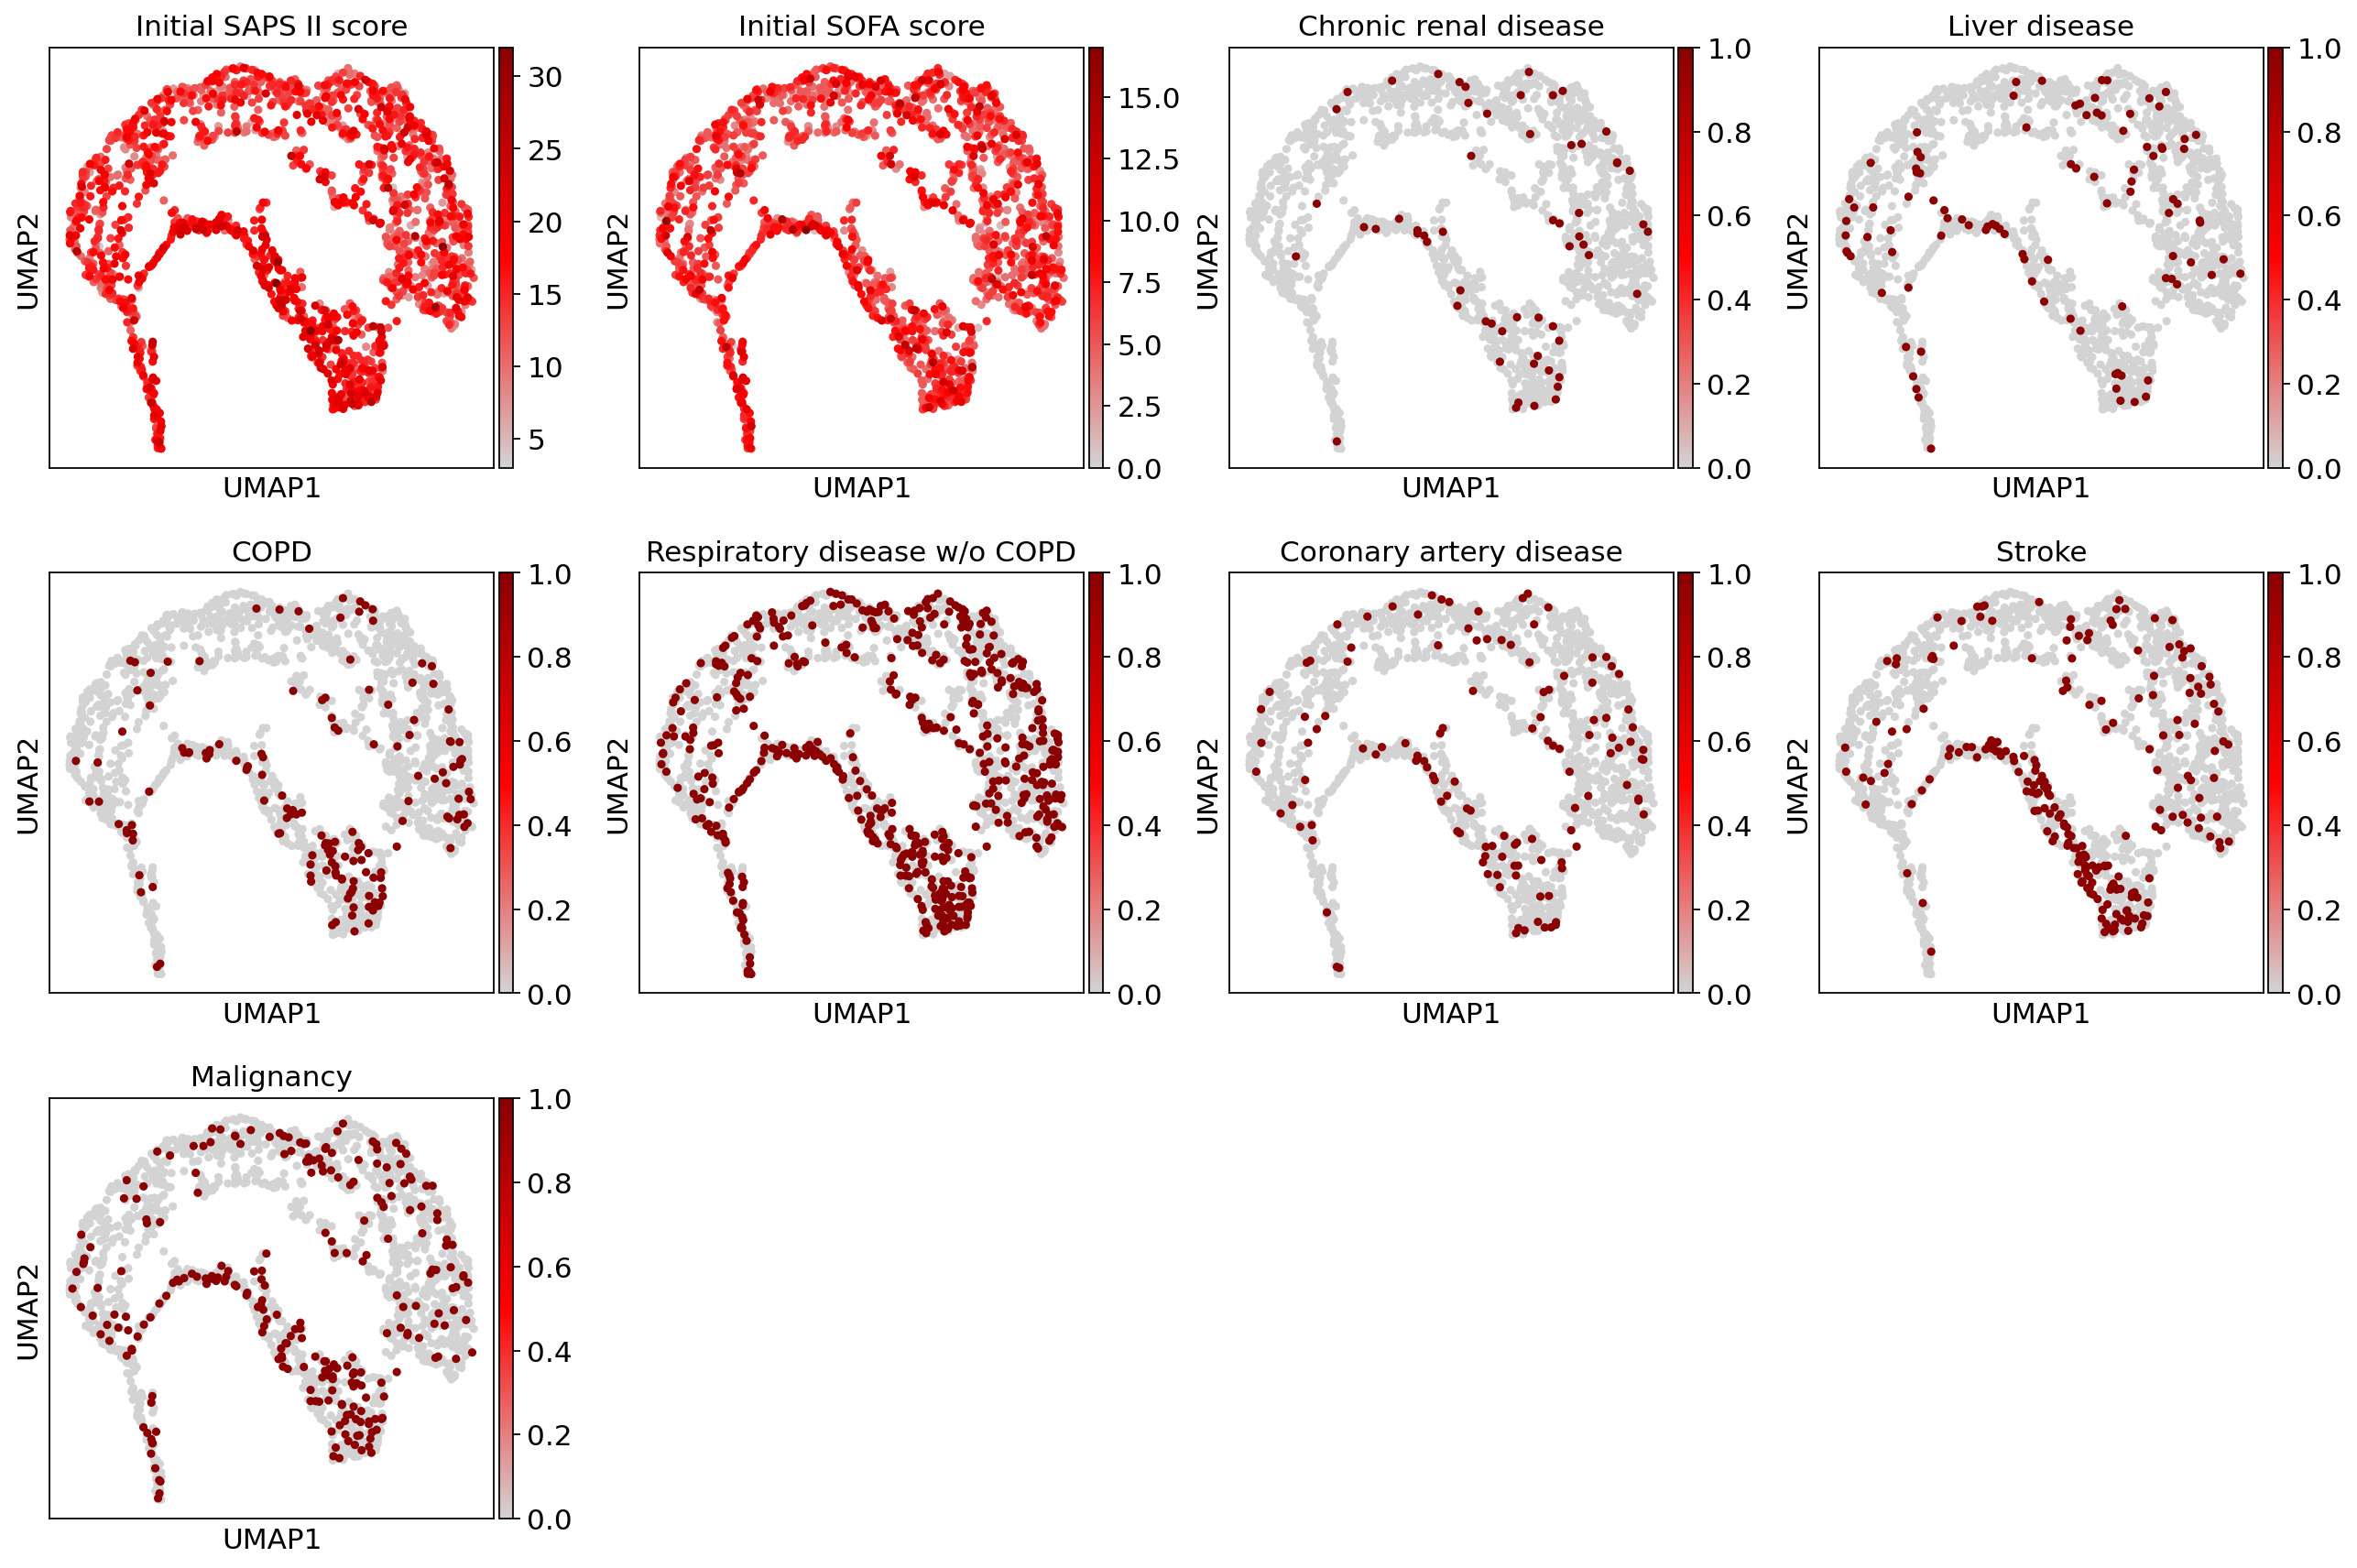

In [30]:
ep.pl.umap(
    adata,
    color=[
        "sapsi_first",
        "sofa_first",
        "renal_flg",
        "liver_flg",
        "copd_flg",
        "resp_flg",
        "cad_flg",
        "stroke_flg",
        "mal_flg",
    ],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=[
        "Initial SAPS II score",
        "Initial SOFA score",
        "Chronic renal disease",
        "Liver disease",
        "COPD",
        "Respiratory disease w/o COPD",
        "Coronary artery disease",
        "Stroke",
        "Malignancy",
    ],
)

# Initial lab measurements

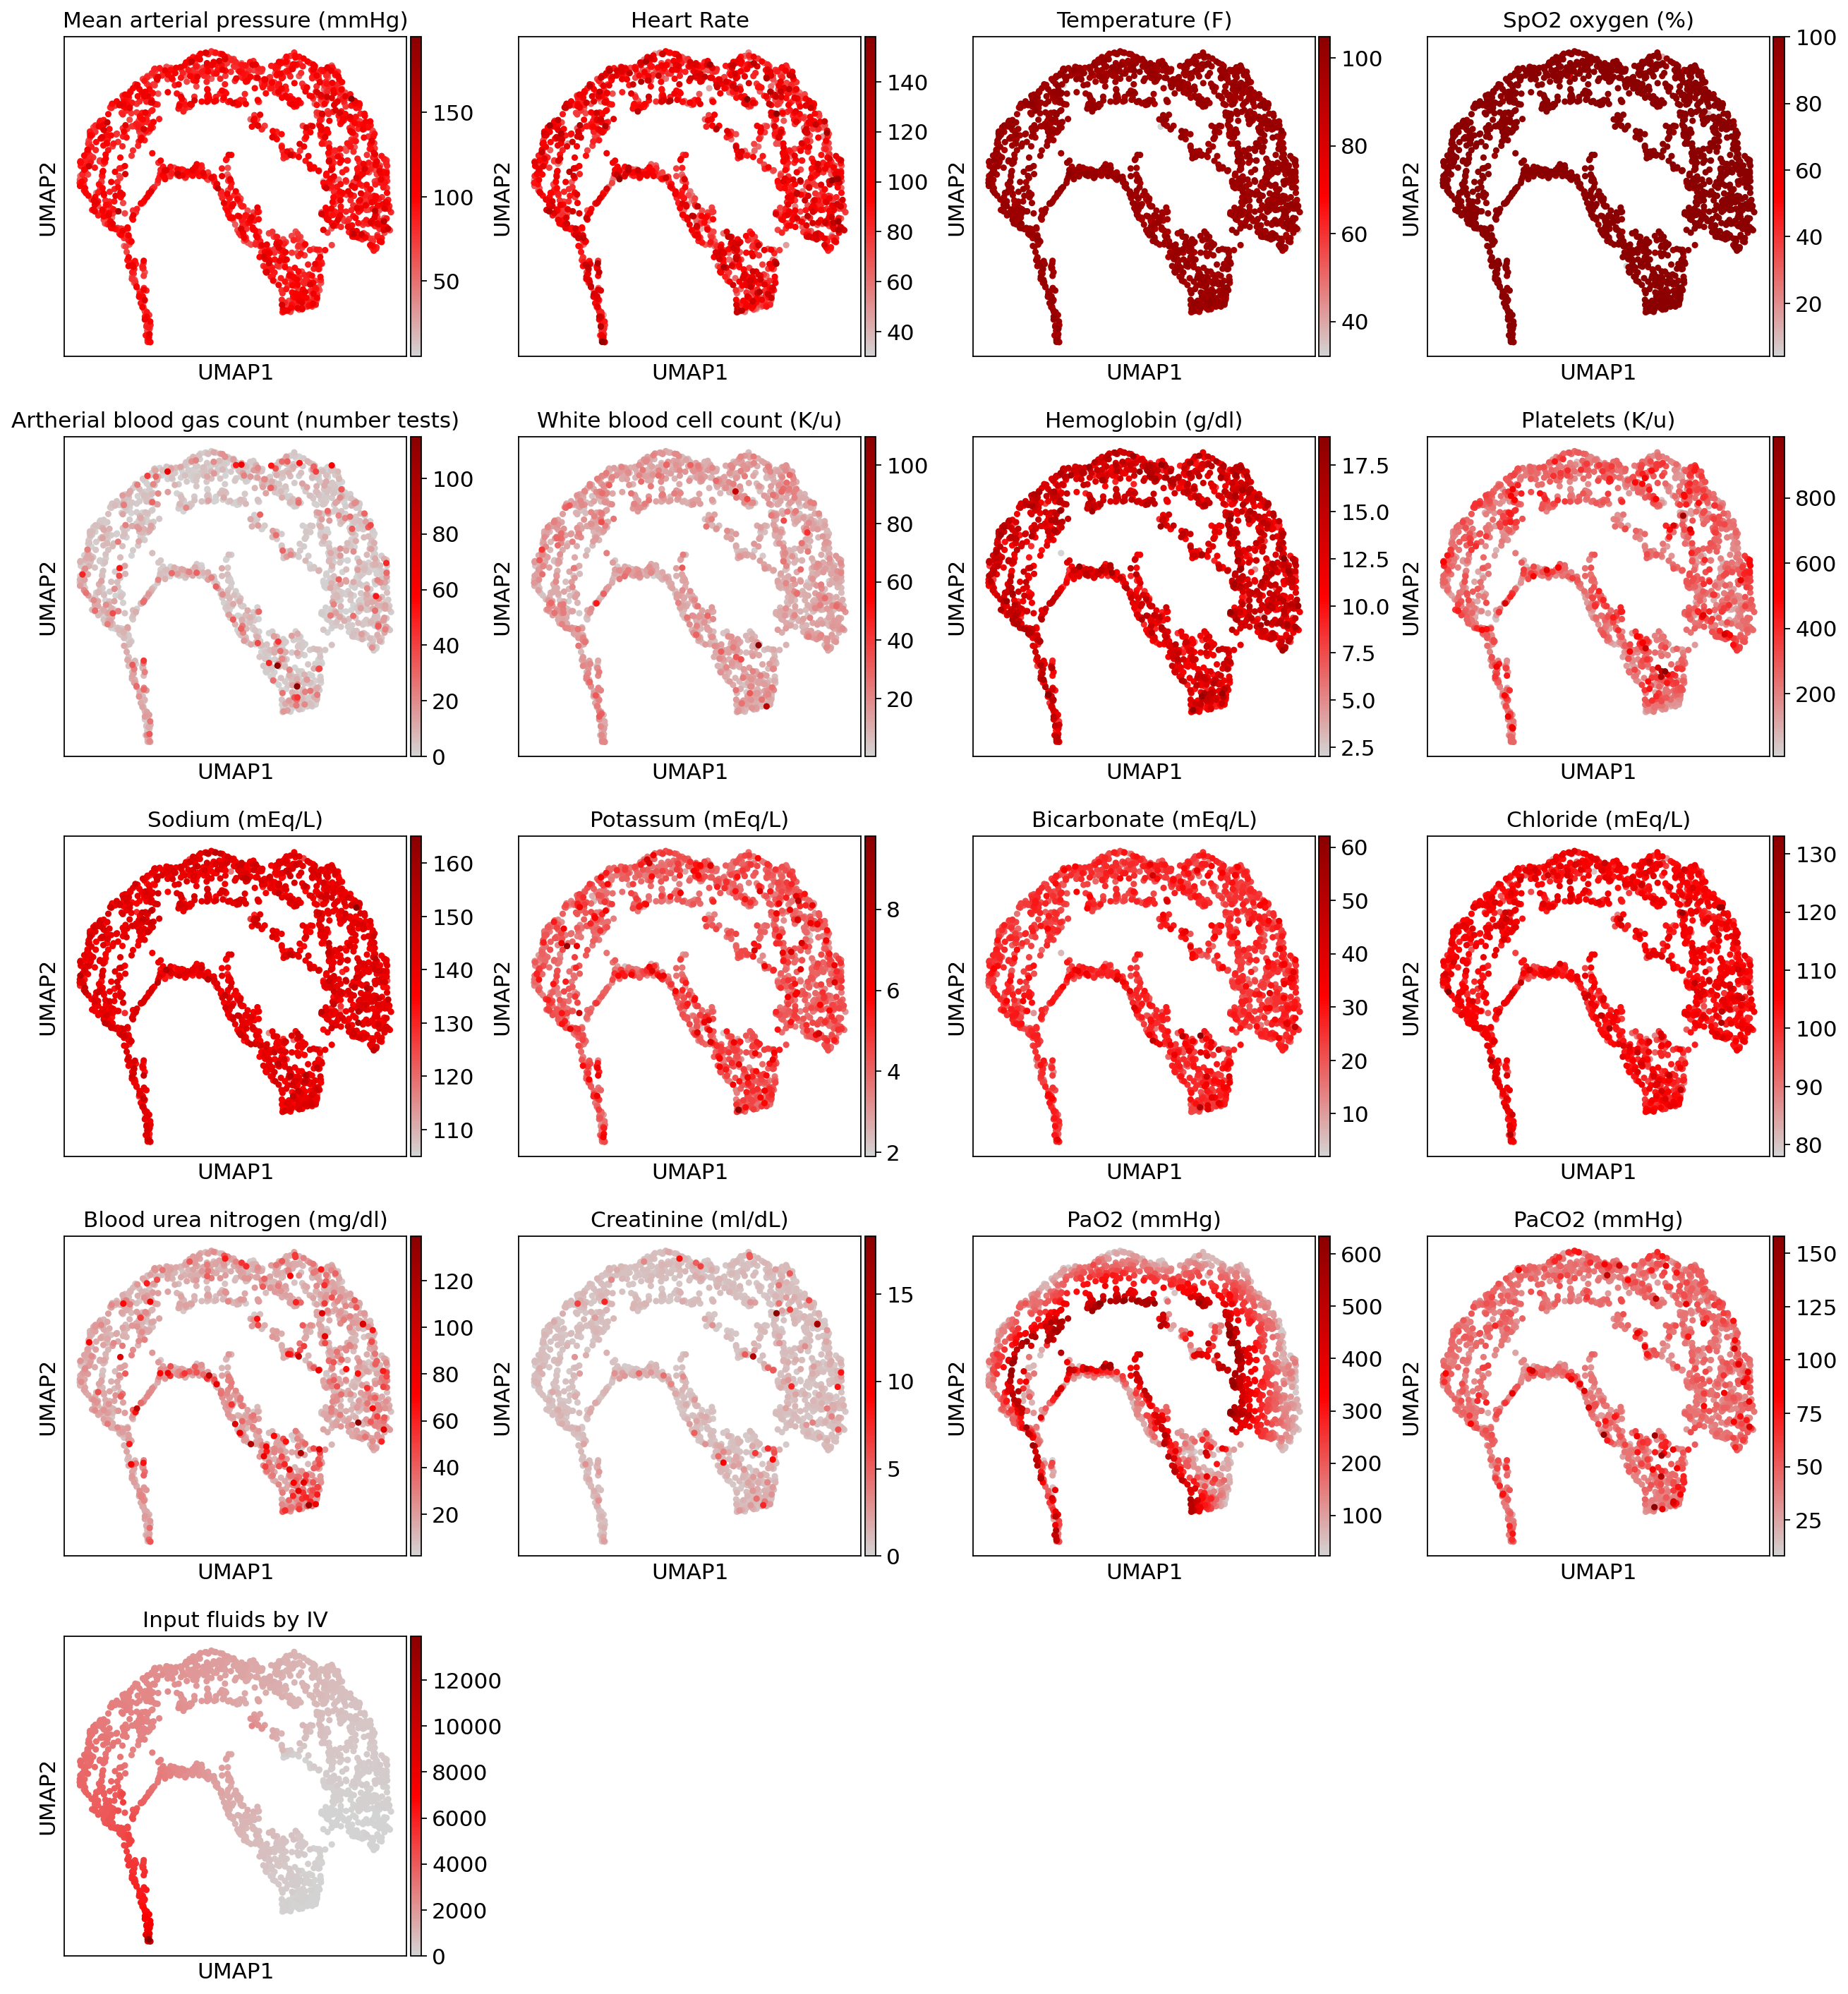

In [31]:
ep.pl.umap(
    adata,
    color=[
        "map_1st",
        "hr_1st",
        "temp_1st",
        "spo2_1st",
        "abg_count",
        "wbc_first",
        "hgb_first",
        "platelet_first",
        "sodium_first",
        "potassium_first",
        "tco2_first",
        "chloride_first",
        "bun_first",
        "creatinine_first",
        "po2_first",
        "pco2_first",
        "iv_day_1",
    ],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=[
        "Mean arterial pressure (mmHg)",
        "Heart Rate",
        "Temperature (F)",
        "SpO2 oxygen (%)",
        "Artherial blood gas count (number tests)",
        "White blood cell count (K/u)",
        "Hemoglobin (g/dl)",
        "Platelets (K/u)",
        "Sodium (mEq/L)",
        "Potassum (mEq/L)",
        "Bicarbonate (mEq/L)",
        "Chloride (mEq/L)",
        "Blood urea nitrogen (mg/dl)",
        "Creatinine (ml/dL)",
        "PaO2 (mmHg)",
        "PaCO2 (mmHg)",
        "Input fluids by IV",
    ],
)

# Annotation

In [32]:
ep.tl.rank_features_groups(adata, groupby="leiden_0_5")

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


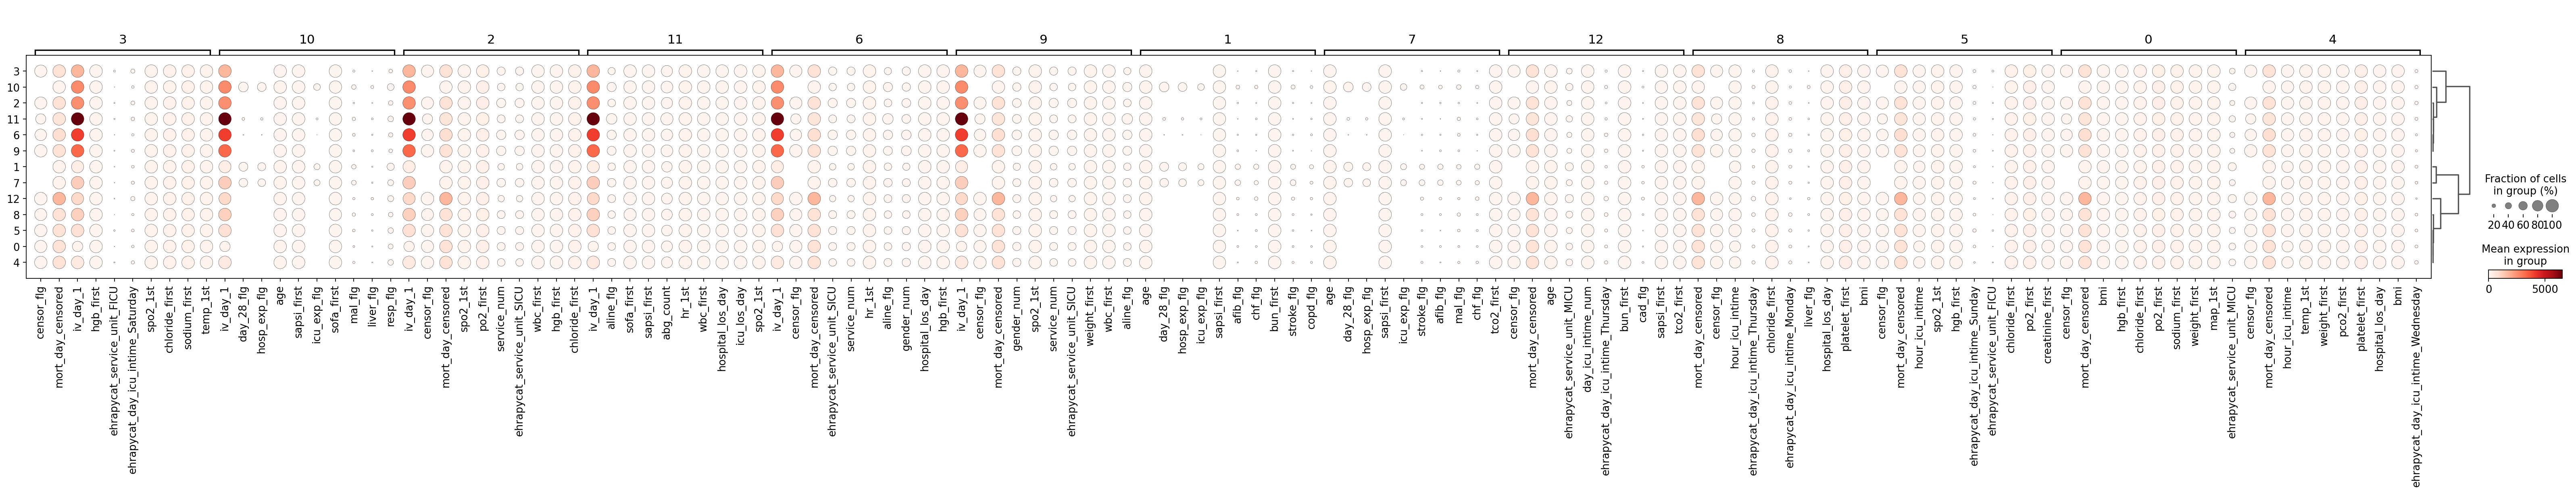

In [33]:
ep.pl.rank_features_groups_dotplot(adata, key="rank_features_groups", groupby="leiden_0_5")

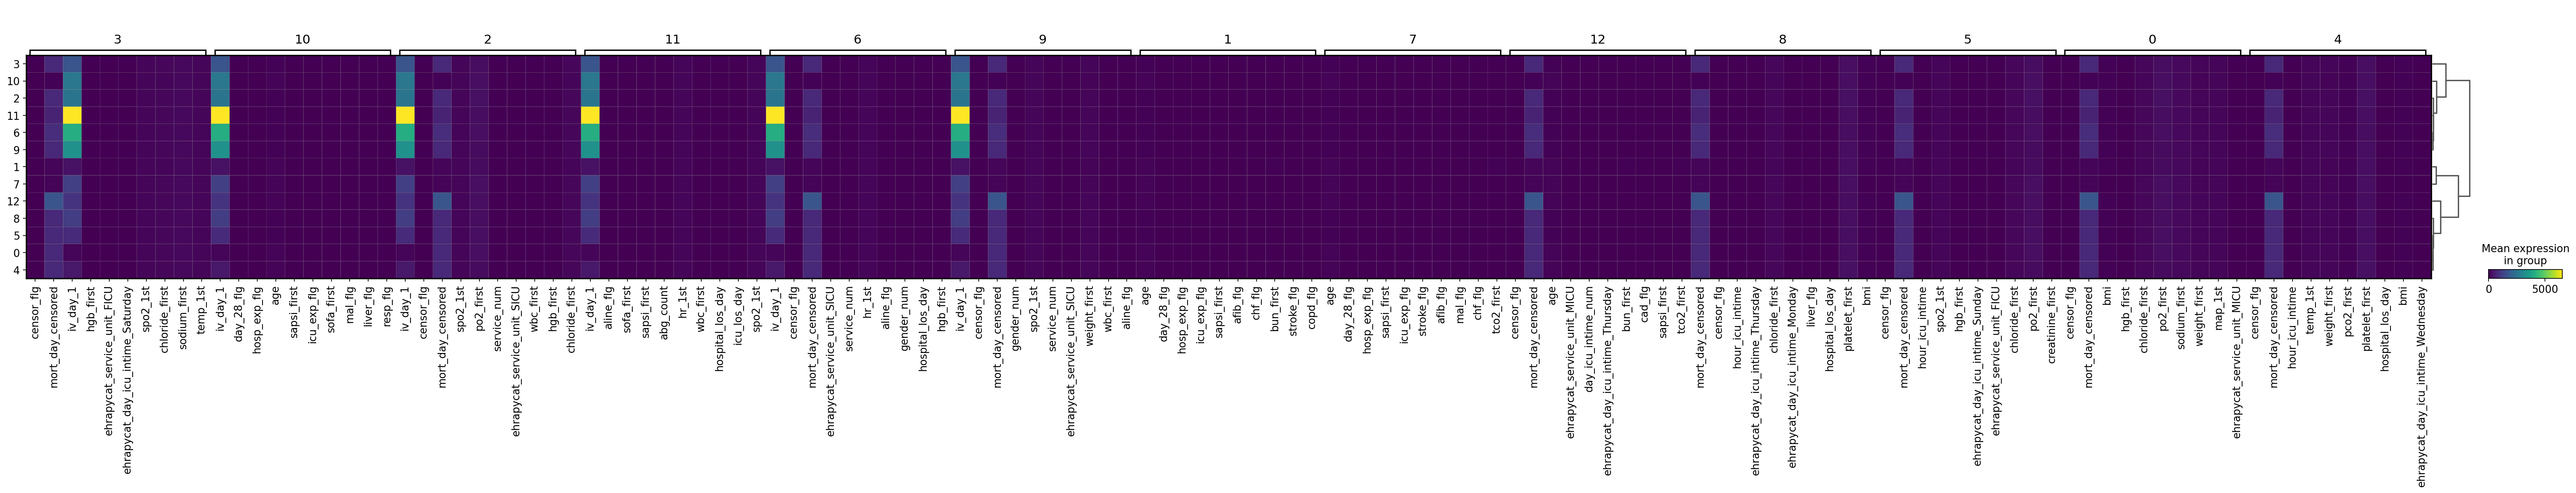

In [34]:
ep.pl.rank_features_groups_matrixplot(adata, key="rank_features_groups", groupby="leiden_0_5")

In [35]:
adata.obs["annotation"] = "NA"

In [36]:
annotation = {
    "0": "age+/death+/stroke+/pao2+",
    "1": "age+/death+/stroke+/tumor+",
    "2": "resp+",
    "3": "resp+",
    "4": "resp+",
    "5": "resp+/liver+/tumor+",
    "6": "resp+",
    "7": "input fluids+",
    "8": "resp+/pao2+",
    "9": "input fluids+",
    "10": "input fluids+",
    "11": "input fluids++/death+",
    "12": "Late death",
}

In [37]:
adata.obs["annotation"] = [
    annotation[l] if l in annotation.keys() else l for l in adata.obs["leiden_0_5"]
]

# Paga 

In [38]:
ep.tl.paga(adata, groups="leiden_0_5")

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'annotation' as categorical


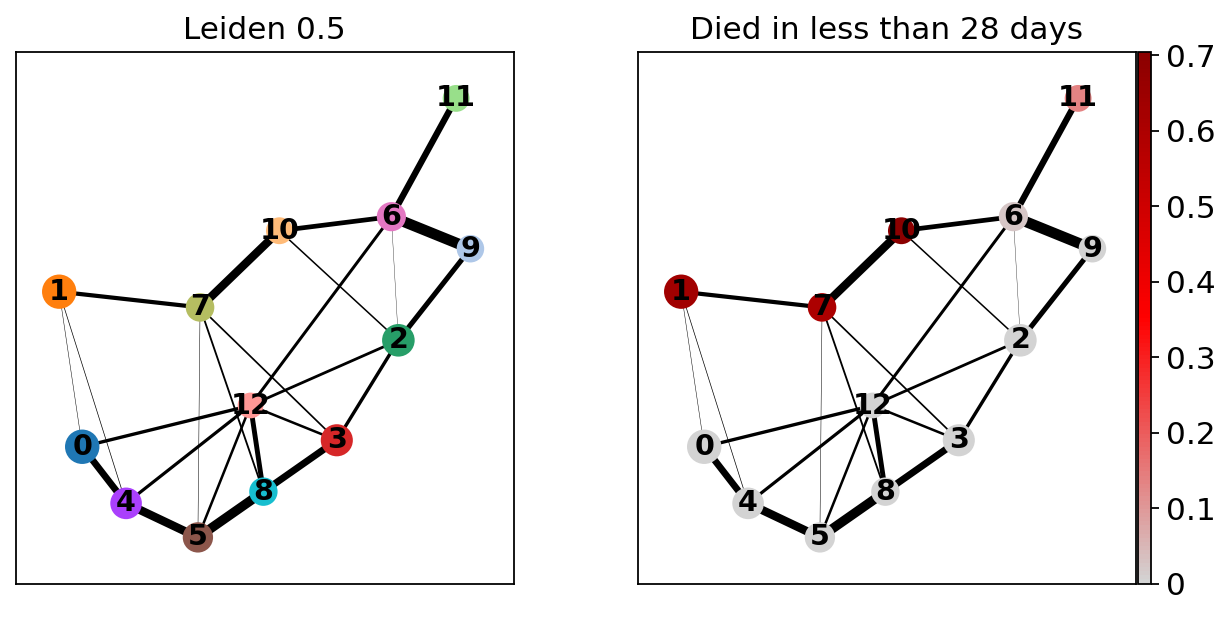

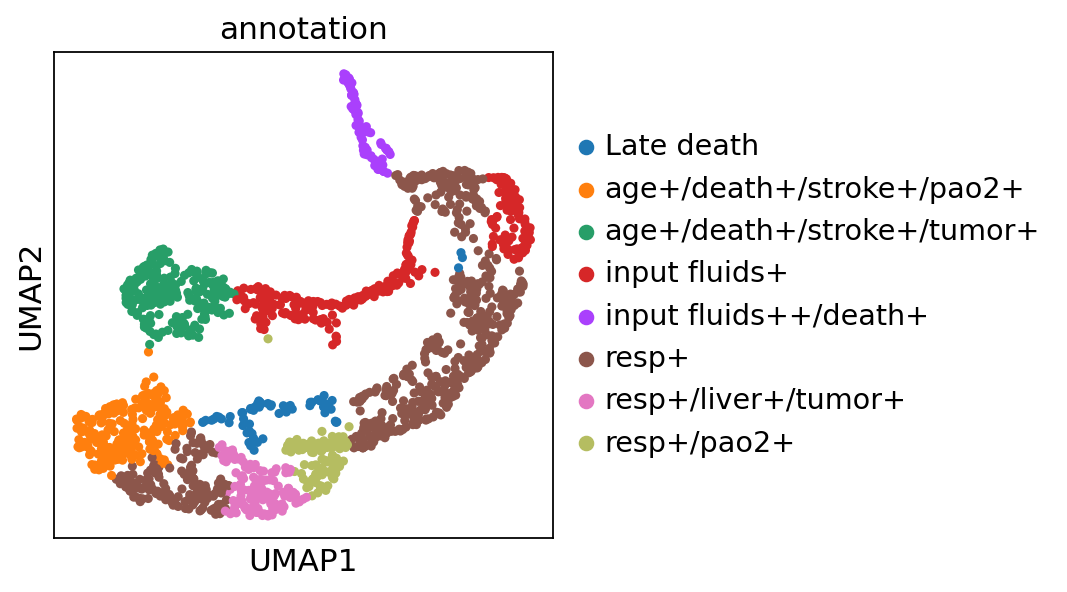

In [45]:
ep.pl.paga(
    adata,
    color=["leiden_0_5", "day_28_flg"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["Leiden 0.5", "Died in less than 28 days"],
)

ep.tl.umap(adata, init_pos="paga")
ep.pl.umap(adata, color=["annotation"])

In [40]:
ep.tl.draw_graph(adata, init_pos="paga")

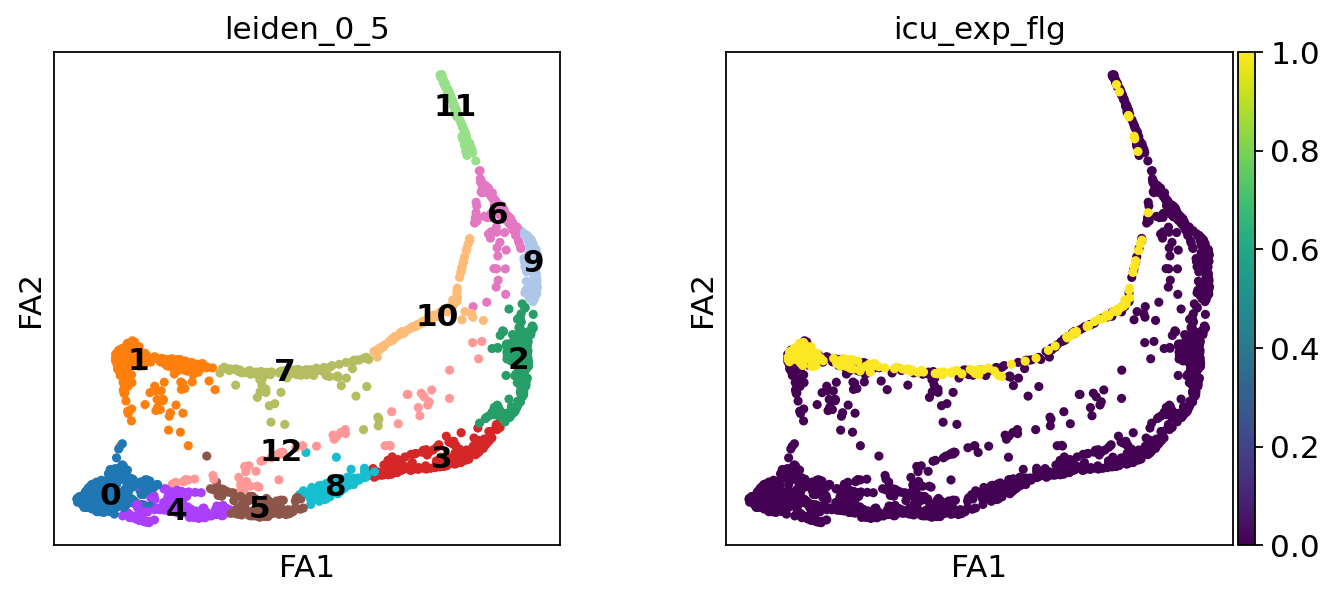

In [41]:
ep.pl.draw_graph(adata, color=["leiden_0_5", "icu_exp_flg"], legend_loc="on data")

## Writing the results into a file

We save all of our computations and our final state into an `.h5ad` file. It can then be read again like `ep.io.read("mimic_2.h5ad", adata)`

In [42]:
ep.io.write("mimic_2.h5ad", adata)